In [4]:
#import
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional

import math
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'


In [22]:
print(np.random.seed(1337))

None


In [5]:
# Load và đọc data
df = pd.read_csv("./MA-CK-2/MA CK 2/DAE.csv")
df.head()

,DATE,CLOSING PRICE,TICKER,OPEN,HIGH,LOW,VOLUME
0,12/6/2020,14300,DAE,14300,14300,14300,300
1,11/6/2020,14100,DAE,14100,14100,14100,2000
2,10/6/2020,14200,DAE,14200,14200,14200,0
3,9/6/2020,14200,DAE,14200,14200,14200,2000
4,8/6/2020,14000,DAE,14000,14000,14000,200


In [6]:
#Nhất quán định dạng data và kiểm tra null
df["CLOSING PRICE"] = pd.to_numeric(df["CLOSING PRICE"])
df["HIGH"] = pd.to_numeric(df["HIGH"])
df["LOW"] = pd.to_numeric(df["LOW"])
df["VOLUME"] = pd.to_numeric(df["VOLUME"])
df.isna().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE           1254 non-null   object
 1   CLOSING PRICE  1254 non-null   int64 
 2   TICKER         1254 non-null   object
 3   OPEN           1254 non-null   int64 
 4   HIGH           1254 non-null   int64 
 5   LOW            1254 non-null   int64 
 6   VOLUME         1254 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 68.7+ KB


In [7]:
#Chia training set và data set

data = df.filter(['CLOSING PRICE'] + ['VOLUME'] +['OPEN'] +['HIGH'] +['LOW'])
dataset = data.values
a = df.filter(['CLOSING PRICE'])
training_data_len = math.ceil(len(dataset ) * .8)

kq = a.values
training_data_len
test_len =len(dataset) -  training_data_len
kq.size

1254

In [8]:
#Scale data
scaler = MinMaxScaler(feature_range =(0,1))
scaler2 = MinMaxScaler(feature_range =(0,1))
scaled_kq = scaler2.fit_transform(kq)
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.1754386 , 0.00167691, 0.21666667, 0.12962963, 0.21666667],
       [0.14035088, 0.01117943, 0.18333333, 0.09259259, 0.18333333],
       [0.15789474, 0.        , 0.2       , 0.11111111, 0.2       ],
       ...,
       [0.40350877, 0.01397429, 0.43333333, 0.37037037, 0.43333333],
       [0.42105263, 0.00167691, 0.45      , 0.38888889, 0.45      ],
       [0.40350877, 0.05086641, 0.43333333, 0.37037037, 0.43333333]])

In [24]:
# Chia training set theo x và y
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data) - 3):
    x_train.append(train_data[i-60:i, :])
    y_train.append(scaled_kq[i + 3, 0])


[[0.1754386  0.00167691 0.21666667 0.12962963 0.21666667]
 [0.14035088 0.01117943 0.18333333 0.09259259 0.18333333]
 [0.15789474 0.         0.2        0.11111111 0.2       ]
 ...
 [0.35087719 0.01397429 0.38333333 0.31481481 0.38333333]
 [0.42105263 0.00223589 0.4        0.38888889 0.4       ]
 [0.36842105 0.01509223 0.41666667 0.35185185 0.4       ]]


In [10]:
scaled_kq

array([[0.1754386 ],
       [0.14035088],
       [0.15789474],
       ...,
       [0.40350877],
       [0.42105263],
       [0.40350877]])

In [11]:
#Chuyển sang mảng numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape du lieu de co the su dung vao model LSTM cua python
temp = x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))
temp.shape

(941, 60, 5)

In [13]:
#xay dung LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (60,5)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#Su dung model
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [15]:
#Bat dau huan luyen
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
941/941 [==============================] - 16s 14ms/step - loss: 0.0130
Epoch 2/2
941/941 [==============================] - 13s 14ms/step - loss: 0.0101


In [16]:
#Tao test set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = kq[training_data_len + 3:,:]
for i in range(60, len(test_data) - 3):
    x_test.append(test_data[i-60:i, :])

In [17]:
#Chuyen sang 3d array de su dung voi LSTM
x_test = np.array(x_test)
x_test.shape


(247, 60, 5)

In [18]:
#Tao hypothesis
predictions = model.predict(x_test)
predictions = scaler2.inverse_transform(predictions)



8/8 [==============================] - 1s 10ms/step


In [19]:
y_test

array([[15700],
       [15700],
       [17400],
       [17400],
       [17400],
       [15900],
       [15900],
       [15900],
       [15900],
       [15900],
       [15900],
       [15900],
       [15900],
       [15900],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [16000],
       [15600],
       [15900],
       [15900],
       [15800],
       [15600],
       [15600],
       [15700],
       [15700],
       [15700],
       [15700],
       [15200],
       [15300],
       [15300],
       [15300],
       [15300],
       [15600],
       [14900],
       [15400],
       [15000],
       [15000],
       [14900],
       [14900],
       [14900],
       [14900],
       [15000],
       [15200],
       [15200],
       [14800],
       [14800],
       [14900],
       [14800],
       [14700],
       [14700],
       [14700],
       [14600],
       [14500],
       [14200],
       [14600],
       [

In [20]:
#Tinh cost function
mse = np.sqrt(np.mean(predictions - y_test)**2) 
mse



203.0943430541498

      CLOSING PRICE
3             14200
4             14000
5             14000
6             14500
7             14500
...             ...
999           15700
1000          16000
1001          15300
1002          15700
1003          15400

[1001 rows x 1 columns]
      CLOSING PRICE   Predictions
1007          15700  15666.291992
1008          15700  15800.934570
1009          17400  15915.298828
1010          17400  15884.087891
1011          17400  15831.764648
...             ...           ...
1249          15600  15594.288086
1250          15600  15617.261719
1251          15600  15638.819336
1252          15700  15675.010742
1253          15600  15702.519531

[247 rows x 2 columns]


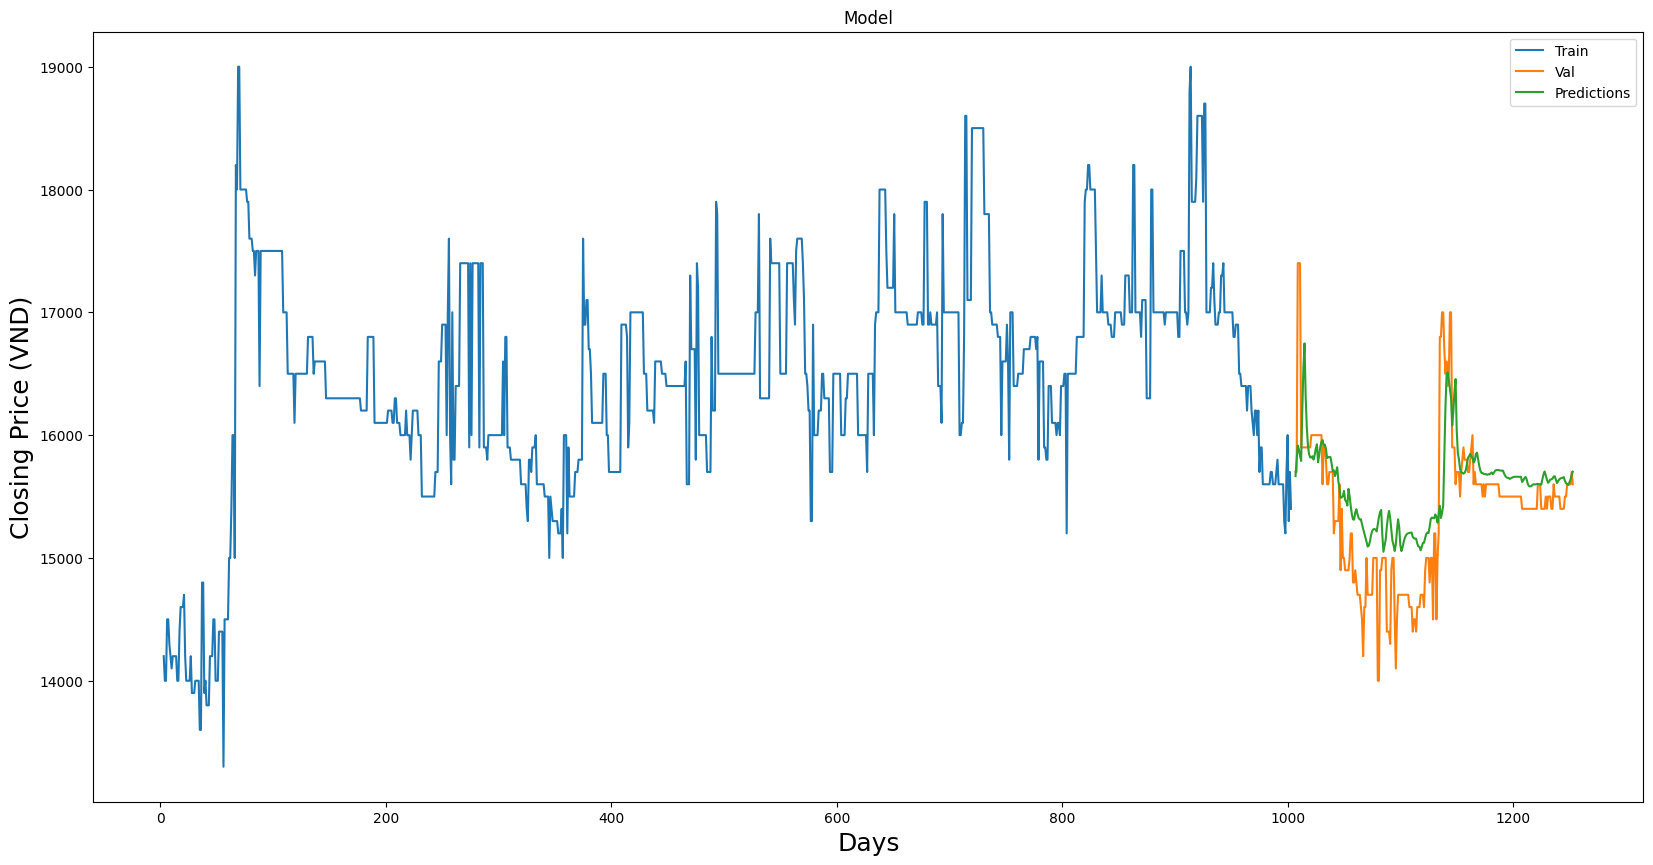

In [21]:
#Plot/Create the data for the graph
train = a[3:training_data_len]
print(train)
valid = a[training_data_len + 3:]
valid['Predictions'] = predictions
print(valid)
# 
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Closing Price (VND)', fontsize=18)
plt.plot(train['CLOSING PRICE'])
plt.plot(valid[['CLOSING PRICE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()